In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from seminartools.data import read_inflation
from seminartools.models.armax_model import ARMAXModel

# 1. Read data

In [3]:
df_inflation = read_inflation()
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
8537,ESP,184,Spain,1970-04-01,0.000000
11635,GTM,258,Guatemala,1970-04-01,0.012577
1231,AUS,193,Australia,1970-04-01,0.011236
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
21697,NZL,196,New Zealand,1970-04-01,0.015421
...,...,...,...,...,...
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
15095,JPN,158,Japan,2023-01-01,0.004500
14347,ITA,136,Italy,2023-01-01,0.003938
21470,NOR,142,Norway,2023-01-01,0.006886


# 2. AR model per country

In [4]:
model = ARMAXModel()
model

In [5]:
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
8537,ESP,184,Spain,1970-04-01,0.000000
11635,GTM,258,Guatemala,1970-04-01,0.012577
1231,AUS,193,Australia,1970-04-01,0.011236
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
21697,NZL,196,New Zealand,1970-04-01,0.015421
...,...,...,...,...,...
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
15095,JPN,158,Japan,2023-01-01,0.004500
14347,ITA,136,Italy,2023-01-01,0.003938
21470,NOR,142,Norway,2023-01-01,0.006886


In [6]:
from warnings import filterwarnings

filterwarnings('ignore')
model.fit(df_inflation)

In [7]:
for country, order in model.orders.items():
    print(f"Order for {country}: {order}")

Order for Spain: (2, 2)
Order for Guatemala: (1, 3)
Order for Australia: (1, 1)
Order for Dominican Republic: (3, 2)
Order for New Zealand: (1, 3)
Order for Italy: (1, 1)
Order for Sweden: (1, 1)
Order for Colombia: (3, 3)
Order for Paraguay: (1, 1)
Order for Peru: (1, 1)
Order for Belgium: (3, 2)
Order for Denmark: (2, 3)
Order for United States: (1, 3)
Order for Philippines: (3, 3)
Order for Indonesia: (2, 0)
Order for Japan: (3, 3)
Order for Finland: (3, 3)
Order for Norway: (1, 1)
Order for Greece: (2, 3)
Order for Austria: (2, 2)
Order for South Africa: (3, 3)
Order for France: (2, 2)
Order for Mauritius: (2, 3)
Order for Luxembourg: (2, 3)
Order for Switzerland: (3, 3)
Order for Singapore: (2, 1)
Order for Malaysia: (2, 2)
Order for Fiji: (3, 3)
Order for Turkey: (2, 3)
Order for Netherlands: (3, 3)
Order for Korea, Rep.: (2, 3)
Order for Thailand: (2, 3)
Order for Canada: (3, 3)
Order for Ireland: (3, 3)
Order for Germany: (3, 3)
Order for United Kingdom: (2, 3)
Order for Portug

In [8]:
model.models["Belgium"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              inflation   No. Observations:                  212
Model:                 ARIMA(3, 0, 2)   Log Likelihood                 790.328
Date:                Tue, 12 Mar 2024   AIC                          -1566.655
Time:                        15:50:16   BIC                          -1543.159
Sample:                    06-30-1970   HQIC                         -1557.159
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0090      0.002      3.740      0.000       0.004       0.014
ar.L1         -0.0541      0.246     -0.220      0.826      -0.535       0.427
ar.L2          0.8888      0.054     16.368      0.000       0.782       0.995
ar.L3         -0.0333      0.189     -0.176      0.860      -0.404       0.337
ma.L1          0.4883      0.228      2.140      0.032       0.041       0.936
ma.L2         -0.4535      0.194     -2.341      0.019      -0.833      -0.074
sigma2      3.359e-05   2.22e-06     15.147      0.000    2.92e-05    3.79e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                73.33
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                             0.00
Prob(H) (two-sided):                  0.36   Kurtosis:                         5.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 3. Evaluation

In [9]:
df_inflation["Country"].unique()

array(['Spain', 'Guatemala', 'Australia', 'Dominican Republic',
       'New Zealand', 'Italy', 'Sweden', 'Colombia', 'Paraguay', 'Peru',
       'Belgium', 'Denmark', 'United States', 'Philippines', 'Indonesia',
       'Japan', 'Finland', 'Norway', 'Greece', 'Austria', 'South Africa',
       'France', 'Mauritius', 'Luxembourg', 'Switzerland', 'Singapore',
       'Malaysia', 'Fiji', 'Turkey', 'Netherlands', 'Korea, Rep.',
       'Thailand', 'Canada', 'Ireland', 'Germany', 'United Kingdom',
       'Portugal', 'Cyprus', 'Iceland', 'Argentina'], dtype=object)

,yearmonth,Country,inflation
0,2023-04-01,Spain,0.015359
1,2023-04-01,Guatemala,0.015807
2,2023-04-01,Australia,0.015285
3,2023-04-01,Dominican Republic,0.019733
4,2023-04-01,New Zealand,0.013069
5,2023-04-01,Italy,0.017374
6,2023-04-01,Sweden,0.019394
7,2023-04-01,Colombia,0.055529
8,2023-04-01,Paraguay,0.018060
9,2023-04-01,Peru,0.059084


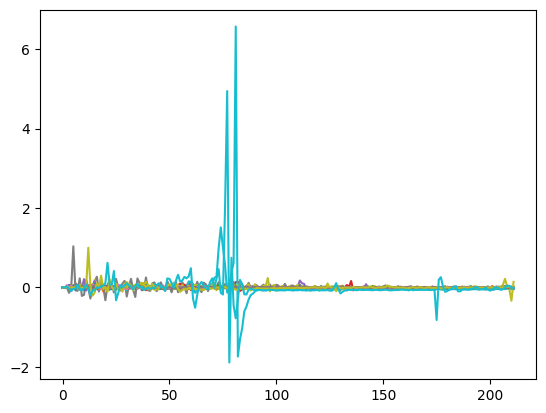

In [10]:
model.predict(df_inflation)

# 3.2. Try to make ARMA forecasts

In [11]:
data = df_inflation[df_inflation["Country"] == "Belgium"]
data

,Country Code,IMF Country Code,Country,yearmonth,inflation
1957,BEL,124,Belgium,1970-04-01,0.005236
1958,BEL,124,Belgium,1970-07-01,0.010417
1959,BEL,124,Belgium,1970-10-01,0.005155
1960,BEL,124,Belgium,1971-01-01,0.010256
1961,BEL,124,Belgium,1971-04-01,0.015228
...,...,...,...,...,...
2164,BEL,124,Belgium,2022-01-01,0.033275
2165,BEL,124,Belgium,2022-04-01,0.016949
2166,BEL,124,Belgium,2022-07-01,0.025000
2167,BEL,124,Belgium,2022-10-01,0.030943


In [12]:
mdl = model.models["Belgium"]
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              inflation   No. Observations:                  212
Model:                 ARIMA(3, 0, 2)   Log Likelihood                 790.328
Date:                Tue, 12 Mar 2024   AIC                          -1566.655
Time:                        15:50:16   BIC                          -1543.159
Sample:                    06-30-1970   HQIC                         -1557.159
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0090      0.002      3.740      0.000       0.004       0.014
ar.L1         -0.0541      0.246     -0.220      0.826      -0.535       0.427
ar.L2          0.8888      0.054     16.368      0.000       0.782       0.995
ar.L3         -0.0333      0.189     -0.176      0.860      -0.404       0.337
ma.L1          0.4883      0.228      2.140      0.032       0.041       0.936
ma.L2         -0.4535      0.194     -2.341      0.019      -0.833      -0.074
sigma2      3.359e-05   2.22e-06     15.147      0.000    2.92e-05    3.79e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                73.33
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                             0.00
Prob(H) (two-sided):                  0.36   Kurtosis:                         5.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

0.009751583921152666

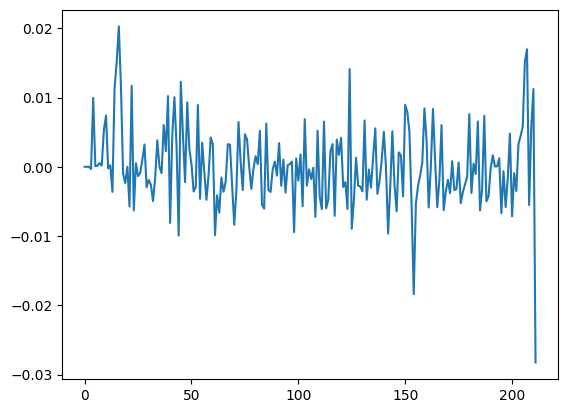

In [13]:
model._predict_country(data, "Belgium")

# 4. H-period ahead forecasting

In [14]:
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
8537,ESP,184,Spain,1970-04-01,0.000000
11635,GTM,258,Guatemala,1970-04-01,0.012577
1231,AUS,193,Australia,1970-04-01,0.011236
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
21697,NZL,196,New Zealand,1970-04-01,0.015421
...,...,...,...,...,...
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
15095,JPN,158,Japan,2023-01-01,0.004500
14347,ITA,136,Italy,2023-01-01,0.003938
21470,NOR,142,Norway,2023-01-01,0.006886


,yearmonth,Country,inflation
0,2020-01-01,Spain,-0.004432
1,2020-01-01,Guatemala,0.018849
2,2020-01-01,Australia,0.005801
3,2020-01-01,Dominican Republic,0.022776
4,2020-01-01,New Zealand,0.006153
...,...,...,...
515,2023-01-01,United Kingdom,0.011607
516,2023-01-01,Portugal,0.013744
517,2023-01-01,Cyprus,0.004165
518,2023-01-01,Iceland,0.014033


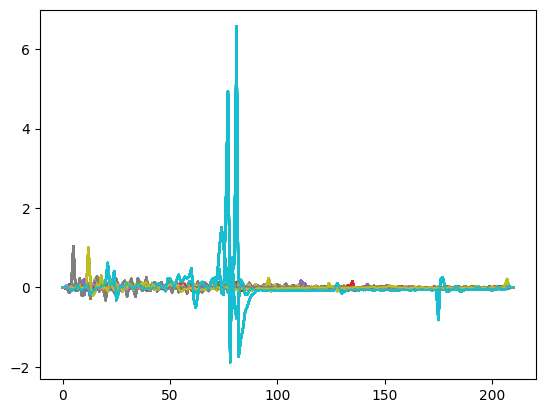

In [15]:
from seminartools.models.utils import h_period_ahead_forecast

forecast = h_period_ahead_forecast(model, df_inflation, "2020-01-01", h=3)
forecast

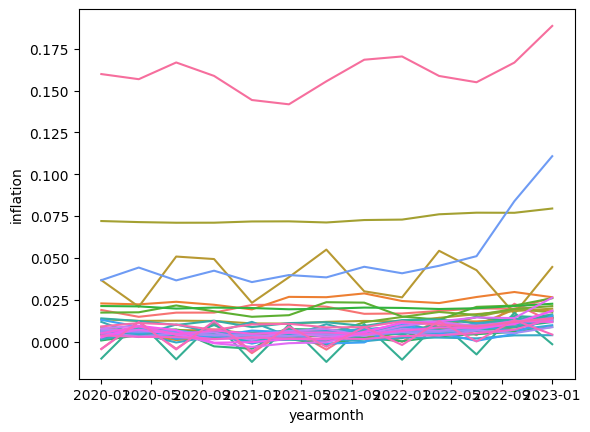

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(
    data = forecast,
    x = "yearmonth",
    y = "inflation",
    hue = "Country"
)
# turn off legend
plt.legend().remove()

In [17]:
model.models["Belgium"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              inflation   No. Observations:                  212
Model:                 ARIMA(3, 0, 2)   Log Likelihood                 790.328
Date:                Tue, 12 Mar 2024   AIC                          -1566.655
Time:                        15:50:24   BIC                          -1543.159
Sample:                    06-30-1970   HQIC                         -1557.159
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0090      0.002      3.740      0.000       0.004       0.014
ar.L1         -0.0541      0.246     -0.220      0.826      -0.535       0.427
ar.L2          0.8888      0.054     16.368      0.000       0.782       0.995
ar.L3         -0.0333      0.189     -0.176      0.860      -0.404       0.337
ma.L1          0.4883      0.228      2.140      0.032       0.041       0.936
ma.L2         -0.4535      0.194     -2.341      0.019      -0.833      -0.074
sigma2      3.359e-05   2.22e-06     15.147      0.000    2.92e-05    3.79e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                73.33
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                             0.00
Prob(H) (two-sided):                  0.36   Kurtosis:                         5.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 5. Compare the forecast with the actual data

In [18]:
forecast_merged = forecast.copy().rename(columns={"inflation": "pred"})
forecast_merged = forecast_merged.merge(
    df_inflation[["Country", "yearmonth", "inflation"]],
    on=["Country", "yearmonth"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_merged.tail(100)

,yearmonth,Country,pred,actual
420,2022-07-01,South Africa,0.010951,0.027957
421,2022-07-01,France,0.006263,0.011638
422,2022-07-01,Mauritius,0.010927,0.023855
423,2022-07-01,Luxembourg,0.008403,0.002584
424,2022-07-01,Switzerland,0.001879,0.006718
...,...,...,...,...
515,2023-01-01,United Kingdom,0.011607,0.008814
516,2023-01-01,Portugal,0.013744,-0.002154
517,2023-01-01,Cyprus,0.004165,-0.008977
518,2023-01-01,Iceland,0.014033,0.025289


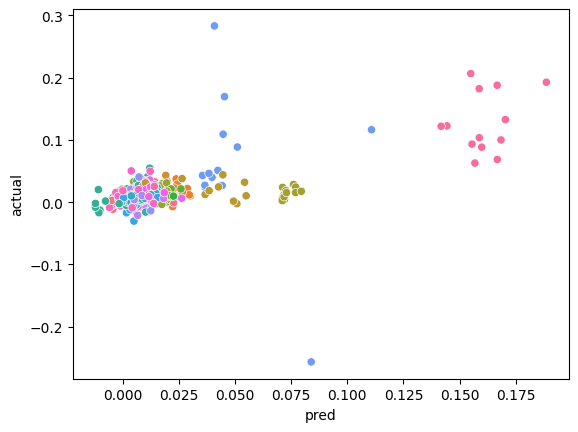

In [19]:
sns.scatterplot(
    data = forecast_merged,
    x = "pred",
    y = "actual",
    hue = "Country"
)
plt.legend().remove()

In [20]:
import statsmodels.api as sm

sm.OLS(
    forecast_merged["actual"], sm.add_constant(forecast_merged["pred"])
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     277.9
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           2.92e-50
Time:                        15:50:24   Log-Likelihood:                 1198.6
No. Observations:                 520   AIC:                            -2393.
Df Residuals:                     518   BIC:                            -2385.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.001      3.963      0.000       0.002       0.007
pred           0.6396      0.038     16.669      0.000       0.564       0.715
==============================================================================
Omnibus:                      328.879   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           135922.121
Skew:                          -1.447   Prob(JB):                         0.00
Kurtosis:                      82.151   Cond. No.                         36.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""